In [7]:
import numpy as np
from IPython.display import Image

# STEP 6 수동 역전파
Variable과 Function 클래스를 확장하여 역전파를 이용한 미분을 구현해보자.

## 6.1 Variable 클래스 추가 구현
역전파에 대응하는 Variable 클래스를 구현해보자.

In [1]:
class Variable:
    def __init__(self, data):
        self.data = data
        self.grad = None

data와 grad 모두 ndarrray이다.  
grad는 None으로 초기화해둔 다음, 나중에 실제로 역전파를 하면 미분값을 계산하여 대입할 예정이다.

## 6.2 Funciton 클래스 추가 구현
지금까지 구현한 Function은 순전파(forward) 기능만 지원하는 상태다. 이외에 다음 두 기능을 추가하겠다.
- 미분을 계산하는 역전파(backwarrd 메서드)
- forward 메서드 호출 시 건네받은 Variable 인스턴스 유지

In [2]:
class Function:
    def __call__(self, input):
        x = input.data
        y = self.forward(x)
        output = Variable(y)
        self.input = input # 입력 변수를 기억(보관)한다. 
        return output
    
    def forward(self, x):
        raise NotImplementedError()
    
    def backward(self, gy):
        raise NotImplementedError()

## 6.3 Square와 Exp 클래스 추가 구현

In [3]:
class Square(Function):
    def forward(self, x):
        y = x ** 2
        return y
    
    def backward(self, gy):
        x = self.input.data
        gx = 2 * x * gy
        return gx

In [5]:
class Exp(Function):
    def forward(self, x):
        y = np.exp(x)
        return y
    
    def backward(self, gy):
        x = self.input.data
        gx = np.exp(x) * gy
        return gx

## 6.4 역전파 구현
이번에는 [그림 6-1]에 해당하는 계산의 미분을 역전파로 계산해보겠다.

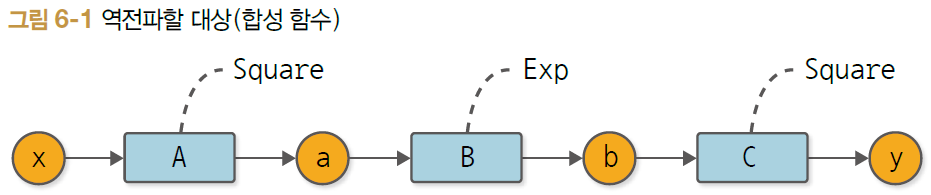

In [8]:
Image("../밑바닥3 그림과 수식/그림 6-1.png")

먼저 순전파하는 코드부터 보자.

In [9]:
A = Square()
B = Exp()
C = Square()

x = Variable(np.array(0.5))
a = A(x)
b = B(a)
y = C(b)

이어서 역전파로 y를 미분해보자.

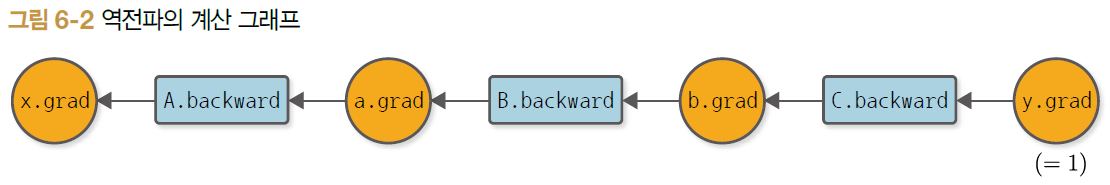

In [10]:
Image("../밑바닥3 그림과 수식/그림 6-2.png")

[그림 6-2]를 보면 어떤 순서로 어느 함수의 backward 메서드를 호출하면 되는지 알 수 있다.  
또한 backward 메서드의 결과를 어느 변수의 grad로 설정하면 되는지도 알 수 있다.

In [11]:
y.grad = np.array(1.0)
b.grad = C.backward(y.grad)
a.grad = B.backward(b.grad)
x.grad = A.backward(a.grad)
print(x.grad)

3.297442541400256


다음 단계에서는 이 작업을 자동화하겠다.